# Tarea Número 2
Programe en lenguaje Python una clase o una jerarquías de clases que permita lo siguiente:
1. Implemente el algoritmo del Análisis en Componentes Principales, ACP, visto en clase para variables numéricas. Debe incluir los cosenos cuadradrados de individuos y de variables.
2. Verifique, usando el ejemplo de Estudiantes y el ejemplo Iris, que los valores propios (eigenvalues_), los cosenos cuadrados de los individuos (row_cosine_similarities), las correlaciones entre variables y componentes (column_correlations) y las componentes principales (row_coordinates) son las mismas que da cuando se ejecuta en el paquete Prince de Python a través de la clase ACP presentada en clases.
3. Implemente métodos que grafiquen el plano principal, el círculo de correlaciones que incluyan la inercia y el gráfico dual (ver ambos gráficos juntos). Compare los ejemplos de la tarea anterior realizados con la clase ACP y ACP_new(ACP) programa por ustedes en la tarea 2, con los resultados obtenidos con su propio programa.
Entregables: Los archivos *.py generados y un archivo *.HTML con las pruebas de verificación de la clase y métodos programados.

## Implementación del Algoritmo de ACP

In [1]:
# %load Extended_PCA.py
import numpy as numpy
import pandas as pandas
from sklearn.preprocessing import StandardScaler
import scipy.linalg as linalg
import os

class Extended_PCA:

    # Constructor
    def __init__(self, data = []):
        self.__data = data
        self.setup_variables()

    # Public methods
    def setup_variables(self):
        self.__center_and_reduce()
        self.__calculate_correlation_matrix()
        self.__calculate_eigen_values()
        self.__calculate_principal_components_matrix()
        self.__calculate_explained_variance()
        self.__calculate_squared_cosines()
        self.__calculate_components_coordinates()

    def print_required_values(self):
        print("Extended_PCA => eigenvalues_: ")
        print(self.eigen_values)
        print("Extended_PCA =>  column_correlations: ")
        print(self.principal_componets_matrix)
        print("Extended_PCA =>  row_cosine_similarities: ")
        print(self.squared_cosines)
        print("Extended_PCA =>  row_coordinates: ")
        print(self.components_coordinates)

    # Private methods
    def __center_and_reduce(self):
        # Colocar todos los valores en una escala común
        self.standard_matrix = pandas.DataFrame(StandardScaler().fit_transform(self.data))

    def __calculate_correlation_matrix(self):
        # 2. Calcular la matriz de correlaciones R
        self.correlation_matrix = self.standard_matrix.corr()

    def __calculate_eigen_values(self):
        # 3. Calcular valores y vectores propios de R
        self.eigen_values, self.partial_eigen_vectors = linalg.eig(self.correlation_matrix)
        self.eigen_values = [numpy.abs(i) * 10 for i in self.eigen_values]
        self.eigen_vectors = []
        size = len(self.partial_eigen_vectors)
        for i in range(size):
            vector = ([val[i] for val in self.partial_eigen_vectors])
            self.eigen_vectors.append(vector)

        # 4. Ordenar de mayor a menor los valores propios
        # 5. Construir matriz V ordenada de acuerdo a valor propio con su correspondiente
        #   vector propio ordenado
        n = len(self.eigen_values)
        for i in range(n-1): 
            for j in range(0, (n-i)-1): 
                if self.eigen_values[j] < self.eigen_values[j+1]:
                    
                    temp_val = self.eigen_values[j]
                    self.eigen_values[j] = self.eigen_values[j+1]
                    self.eigen_values[j+1] = temp_val
                    
                    temp_vec = list(self.partial_eigen_vectors[j])
                    self.eigen_vectors[j] = list(self.eigen_vectors[j+1])
                    self.eigen_vectors[j+1] = temp_vec

    def __calculate_principal_components_matrix(self): 
        # 6. Calcular la matriz de componentes principales C
        self.principal_componets_matrix = pandas.DataFrame(numpy.mat(self.standard_matrix) * numpy.mat(self.partial_eigen_vectors))

    def __calculate_explained_variance(self):
        # 6.1. Calcular la varianza explicada
        sum_eigen_values = sum(self.eigen_values)
        #print(sum_eigen_values)
        self.explained_variance = [(i / sum_eigen_values) * 100 for i in self.eigen_values]

    def __calculate_squared_cosines(self):
        # 7. Calcular los Cosenos cuadrados
        squared_coordinates = numpy.square(self.principal_componets_matrix)
        total_squares = squared_coordinates.sum(axis = "columns")
        self.squared_cosines = pandas.DataFrame(squared_coordinates).div(total_squares, axis = "rows")

    def __calculate_components_coordinates(self):
        # 8. Get the correlation matrix to print in the graphic, correlate each principal
        #    component with each column in centered and reduced matrix
        correlation_matrix = []
        for i in self.standard_matrix.columns.values:
            correlation_matrix.append(list(map(lambda c : self.principal_componets_matrix[c].corr(self.standard_matrix[i]), self.principal_componets_matrix.columns)))
        self.components_coordinates = pandas.DataFrame(correlation_matrix, index = self.data.columns.values)

    # Getters and Setters
    @property 
    def data(self):
        return self.__data
    
    @data.setter
    def data(self, data):
        self.__data = data

    @property 
    def standard_matrix(self):
        return self.__standard_matrix
    
    @standard_matrix.setter
    def standard_matrix(self, standard_matrix):
        self.__standard_matrix = standard_matrix

    @property 
    def correlation_matrix(self):
        return self.__correlation_matrix
    
    @correlation_matrix.setter
    def correlation_matrix(self, correlation_matrix):
        self.__correlation_matrix = correlation_matrix

    @property 
    def components_coordinates(self):
        return self.__components_coordinates
    
    @components_coordinates.setter
    def components_coordinates(self, components_coordinates):
        self.__components_coordinates = components_coordinates

    @property 
    def eigen_values(self):
        return self.__eigen_values
    
    @eigen_values.setter
    def eigen_values(self, eigen_values):
        self.__eigen_values = eigen_values

    @property 
    def eigen_vectors(self):
        return self.__eigen_vectors
    
    @eigen_vectors.setter
    def eigen_vectors(self, eigen_vectors):
        self.__eigen_vectors = eigen_vectors

    @property 
    def squared_cosines(self):
        return self.__squared_cosines
    
    @squared_cosines.setter
    def squared_cosines(self, squared_cosines):
        self.__squared_cosines = squared_cosines

    @property 
    def explained_variance(self):
        return self.__explained_variance
    
    @explained_variance.setter
    def explained_variance(self, explained_variance):
        self.__explained_variance = explained_variance

    @property 
    def principal_componets_matrix(self):
        return self.__principal_componets_matrix
    
    @principal_componets_matrix.setter
    def principal_componets_matrix(self, principal_componets_matrix):
        self.__principal_componets_matrix = principal_componets_matrix

    @property 
    def partial_eigen_vectors(self):
        return self.__partial_eigen_vectors
    
    @partial_eigen_vectors.setter
    def partial_eigen_vectors(self, partial_eigen_vectors):
        self.__partial_eigen_vectors = partial_eigen_vectors

## Verificación de la Implementación

In [2]:
from Visual_PCA import Visual_PCA
import pandas as pandas
import os


project_path = "/Users/rsalazar/Development/learning/machine_learning/module_2/week_2/homework/week_2_homework/"
os.chdir(project_path + "/resources")
data = pandas.read_csv("EjemploEstudiantes.csv", delimiter = ";", decimal = ",", index_col = 0)
os.chdir(project_path)

extended_acp = Visual_PCA(data)

### Valores y Vectores Propios

In [3]:
print(extended_acp.eigen_values)

[28.932496734179427, 16.286504249773166, 3.4659604851452923, 1.2261245959725278, 0.08891393492955547]


### Cosenos Cuadrados de los Individuos

In [4]:
print(extended_acp.squared_cosines)

          0         1         2         3         4
0  0.022271  0.670421  0.306660  0.000003  0.000646
1  0.139906  0.848431  0.006687  0.004809  0.000168
2  0.514469  0.136123  0.202440  0.010449  0.136520
3  0.936852  0.006429  0.013584  0.000364  0.042771
4  0.084140  0.656354  0.245604  0.005358  0.008545
5  0.732686  0.261980  0.004053  0.000161  0.001121
6  0.001893  0.886081  0.106192  0.000071  0.005763
7  0.673612  0.270910  0.048917  0.000051  0.006510
8  0.808830  0.137637  0.017607  0.000125  0.035800
9  0.308554  0.677869  0.000311  0.011419  0.001846


### Correlaciones Entre Variables y Componentes

In [5]:
print(extended_acp.principal_componets_matrix)

          0         1         2         3         4
0 -0.323063  1.772525 -1.198801 -0.003633 -0.055015
1 -0.665441 -1.638702 -0.145476  0.123377 -0.023065
2 -1.002547 -0.515692 -0.628888 -0.142876  0.516444
3  3.172095 -0.262782  0.381960  0.062504  0.677777
4  0.488868  1.365402  0.835236 -0.123367 -0.155792
5 -1.708633 -1.021700  0.127077 -0.025292  0.066833
6 -0.067586  1.462336  0.506240 -0.013124 -0.117928
7 -2.011855 -1.275865  0.542150 -0.017434 -0.197787
8  3.042030 -1.254881 -0.448829 -0.037885 -0.639999
9 -0.923869  1.369359  0.029330  0.177730 -0.071467


In [6]:
print(extended_acp.correlation_matrix)

                    0         1         2         3         4
Matematicas  1.000000  0.854079  0.384574  0.207194 -0.787163
Ciencias     0.854079  1.000000 -0.020052 -0.021539 -0.687721
Espanol      0.384574 -0.020052  1.000000  0.820916 -0.365543
Historia     0.207194 -0.021539  0.820916  1.000000 -0.508001
EdFisica    -0.787163 -0.687721 -0.365543 -0.508001  1.000000


### Componentes Principales

In [7]:
print(extended_acp.components_coordinates)

                    0         1         2         3         4
Matematicas -0.895798 -0.345204 -0.257979 -0.058828 -0.091468
Ciencias    -0.722798 -0.648395 -0.023840  0.030682  0.235878
Espanol     -0.610893  0.717321 -0.331025  0.045615 -0.024542
Historia    -0.599923  0.748470  0.232063 -0.039644  0.156397
EdFisica     0.913926  0.119637 -0.340651 -0.028929  0.183154


## Implementación de Gráficos

In [8]:
# %load Visual_PCA.py
from Extended_PCA import Extended_PCA
import matplotlib.pyplot as plt

class Visual_PCA(Extended_PCA):

    def __init__(self, data):
        super().__init__(data)

    def draw_principal_plain(self, ejes = [0, 1], ind_labels = True, titulo = 'Plano Principal'):
        x = self.components_coordinates[ejes[0]].values
        y = self.components_coordinates[ejes[1]].values
        plt.subplots(figsize=(13, 13))
        plt.style.use('seaborn-whitegrid')
        plt.scatter(x, y, color = 'gray')
        plt.title(titulo)
        plt.axhline(y = 0, color = 'dimgrey', linestyle = '--')
        plt.axvline(x = 0, color = 'dimgrey', linestyle = '--')
        inercia_x = round(self.explained_variance[ejes[0]], 2)
        inercia_y = round(self.explained_variance[ejes[1]], 2)
        plt.xlabel('Componente ' + str(ejes[0]) + ' (' + str(inercia_x) + '%)')
        plt.ylabel('Componente ' + str(ejes[1]) + ' (' + str(inercia_y) + '%)')
        if ind_labels:
            for i, txt in enumerate(self.components_coordinates.index):
                plt.annotate(txt, (x[i], y[i]))

    def draw_circle(self, ejes = [0, 1], var_labels = True, titulo = 'Círculo de Correlación'):
        cor = self.correlation_matrix.iloc[:, ejes].values
        plt.style.use('seaborn-whitegrid')
        c = plt.Circle((0, 0), radius = 1, color = 'steelblue', fill = False)
        plt.subplots(figsize=(13, 13))
        plt.gca().add_patch(c)
        plt.axis('scaled')
        plt.title(titulo)
        plt.axhline(y = 0, color = 'dimgrey', linestyle = '--')
        plt.axvline(x = 0, color = 'dimgrey', linestyle = '--')
        inercia_x = round(self.explained_variance[ejes[0]], 2)
        inercia_y = round(self.explained_variance[ejes[1]], 2)
        plt.xlabel('Componente ' + str(ejes[0]) + ' (' + str(inercia_x) + '%)')
        plt.ylabel('Componente ' + str(ejes[1]) + ' (' + str(inercia_y) + '%)')
        for i in range(cor.shape[0]):
            plt.arrow(0, 0, cor[i, 0] * 0.95, cor[i, 1] * 0.95, color = 'steelblue', 
                      alpha = 0.5, head_width = 0.05, head_length = 0.05)
            if var_labels:
                plt.text(cor[i, 0] * 1.05, cor[i, 1] * 1.05, self.correlation_matrix.index[i], 
                         color = 'steelblue', ha = 'center', va = 'center')

    def draw_superposition(self, ejes = [0, 1], ind_labels = True, var_labels = True, titulo = 'Sobreposición Plano-Círculo'):
        self.draw_principal_plain(ejes, ind_labels, titulo)
        self.draw_circle(ejes, ind_labels, titulo)

### Plano Principal

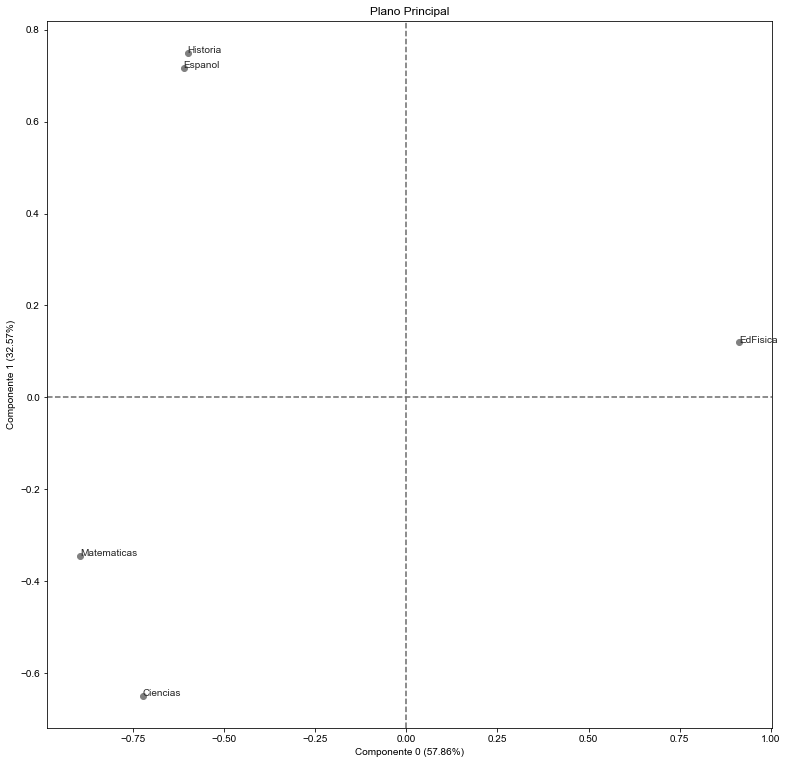

In [9]:
extended_acp.draw_principal_plain()

### Círculo de Correlaciones

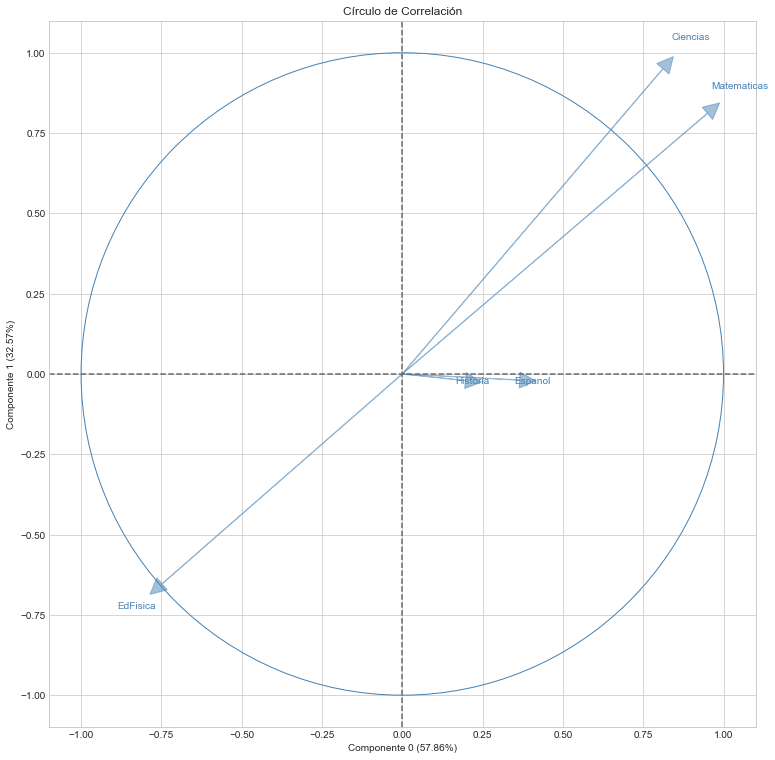

In [10]:
extended_acp.draw_circle()

### Gráfico Dual

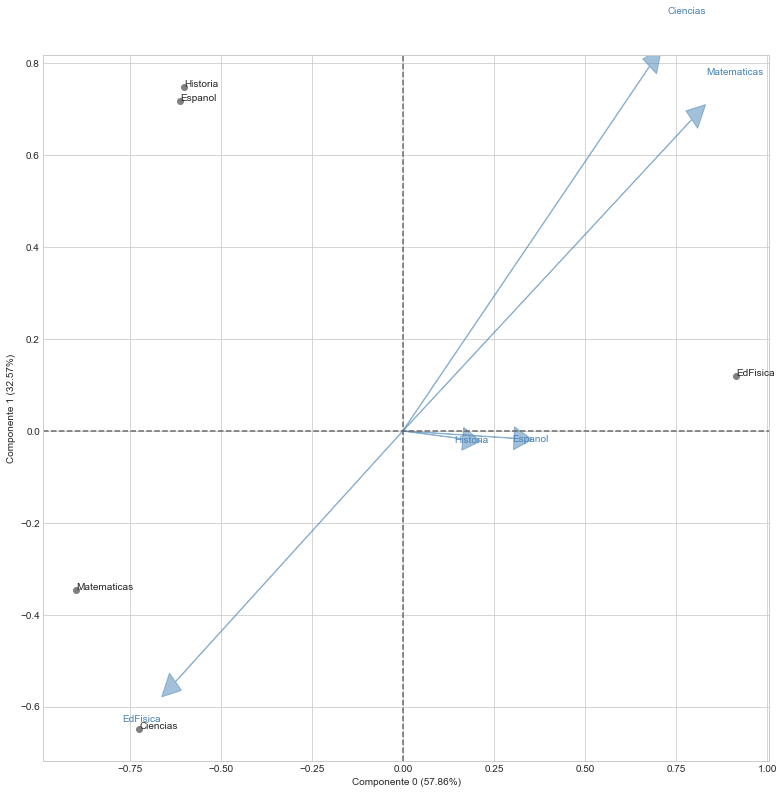

In [11]:
extended_acp.draw_superposition()